## The Goal

The goal of the problem is to predict whether a passenger was satisfied or not considering his/her overall experience of traveling on the Shinkansen Bullet Train.

### Problem Statement

This problem statement is based on the Shinkansen Bullet Train in Japan, and passengers’ experience with that mode of travel. This machine learning exercise aims to determine the relative importance of each parameter about their contribution to the passengers’ overall travel experience. The dataset contains a random sample of individuals who traveled on this train. The on-time performance of the trains along with passenger information is published in a file named ‘Traveldata_train.csv’.  These passengers were later asked to provide their feedback on various parameters related to the travel along with their overall experience. These collected details are made available in the survey report labeled ‘Surveydata_train.csv’.

In the survey, each passenger was explicitly asked whether they were satisfied with their overall travel experience or not, and that is captured in the data of the survey report under the variable labeled ‘Overall_Experience’.

The objective of this problem is to understand which parameters play an important role in swaying passenger feedback towards a positive scale. You are provided test data containing the travel data and the survey data of passengers. Both the test data and the train data are collected at the same time and belong to the same population.

**Dataset:**

The problem consists of 2 separate datasets: Travel data & Survey data. Travel data has information related to passengers and attributes related to the Shinkansen train, in which they traveled. The survey data is aggregated data of surveys indicating the post-service experience. You are expected to treat both these datasets as raw data and perform any necessary data cleaning/validation steps as required.

The data has been split into two groups and provided in the Dataset folder. The folder contains both train and test data separately.

* Train_Data
* Test_Data

**Target Variable:** Overall_Experience (1 represents ‘satisfied’, and 0 represents ‘not satisfied’)

The training set can be used to build your machine learning model. The training set has labels for the target column - Overall_Experience.

The testing set should be used to see how well your model performs on unseen data. For the test set, it is expected to predict the ‘Overall_Experience’ level for each participant.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip3 install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.0 MB/s eta 0:00:00


**Importing necessary libraries**

In [ ]:
#import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

# Import machine learning libraries
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,BaggingClassifier, VotingClassifier, StackingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from tensorflow import keras
from tensorflow.keras import layers

# For hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,accuracy_score
import scipy.stats as stats

# To ignore warnings
from warnings import filterwarnings
filterwarnings("ignore")


# Read Train Dataset

In [ ]:
#Read all csv files
df_Surveydata_train = pd.read_csv('/content/drive/MyDrive/MIT ADSP/Hackathon/Surveydata_train_.csv')
df_Traveldata_train = pd.read_csv('/content/drive/MyDrive/MIT ADSP/Hackathon/Traveldata_train_.csv')

In [ ]:
# Surveydata_train_Head
df_Surveydata_train.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [ ]:
# Surveydata_train_tail
df_Surveydata_train.tail()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
94374,98894375,0,Poor,Ordinary,Good,Good,Convenient,Poor,Poor,Poor,Poor,Good,Good,Good,Needs Improvement,Good,Poor
94375,98894376,1,Good,Ordinary,Good,Good,Convenient,Needs Improvement,Excellent,Excellent,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Good
94376,98894377,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Acceptable,Good,Acceptable
94377,98894378,0,Needs Improvement,Ordinary,NaN,Needs Improvement,Convenient,Good,Needs Improvement,Good,Good,Acceptable,Good,Good,Good,Excellent,Good
94378,98894379,0,Acceptable,Ordinary,Poor,Acceptable,Manageable,Acceptable,Acceptable,Acceptable,Acceptable,Poor,Good,Good,Poor,Good,Acceptable


In [ ]:
# Travel data_train_Head
df_Traveldata_train.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [ ]:
# Travel data_train_tail
df_Traveldata_train.tail()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
94374,98894375,Male,Loyal Customer,32.0,Business Travel,Business,1357,83.0,125.0
94375,98894376,Male,Loyal Customer,44.0,Business Travel,Business,592,5.0,11.0
94376,98894377,Male,NaN,63.0,Business Travel,Business,2794,0.0,0.0
94377,98894378,Male,Loyal Customer,16.0,Personal Travel,Eco,2744,0.0,0.0
94378,98894379,Male,Loyal Customer,54.0,NaN,Eco,2107,28.0,28.0


In [ ]:
# shape of surveydata train
df_Surveydata_train.shape

(94379, 17)

In [ ]:
# shape of traveldata train
df_Traveldata_train.shape

(94379, 9)

In [ ]:
# merge Surveydata & travel data for Train and testset
df_train = pd.merge (df_Surveydata_train, df_Traveldata_train, on = 'ID' , how = 'outer')

In [ ]:
# merged trainset first 5 rows
df_train.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,...,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,...,Needs Improvement,Poor,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,...,Good,Good,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,...,Excellent,Excellent,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,...,Acceptable,Acceptable,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,...,Good,Good,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [ ]:
# merged trainset last 5 rows
df_train.tail()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,...,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
94374,98894375,0,Poor,Ordinary,Good,Good,Convenient,Poor,Poor,Poor,...,Good,Poor,Male,Loyal Customer,32.0,Business Travel,Business,1357,83.0,125.0
94375,98894376,1,Good,Ordinary,Good,Good,Convenient,Needs Improvement,Excellent,Excellent,...,Acceptable,Good,Male,Loyal Customer,44.0,Business Travel,Business,592,5.0,11.0
94376,98894377,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Good,...,Good,Acceptable,Male,NaN,63.0,Business Travel,Business,2794,0.0,0.0
94377,98894378,0,Needs Improvement,Ordinary,NaN,Needs Improvement,Convenient,Good,Needs Improvement,Good,...,Excellent,Good,Male,Loyal Customer,16.0,Personal Travel,Eco,2744,0.0,0.0
94378,98894379,0,Acceptable,Ordinary,Poor,Acceptable,Manageable,Acceptable,Acceptable,Acceptable,...,Good,Acceptable,Male,Loyal Customer,54.0,NaN,Eco,2107,28.0,28.0


In [ ]:
#shape of merged train dataset
df_train.shape

(94379, 25)

In [ ]:
#info of merged train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Overall_Experience       94379 non-null  int64  
 2   Seat_Comfort             94318 non-null  object 
 3   Seat_Class               94379 non-null  object 
 4   Arrival_Time_Convenient  85449 non-null  object 
 5   Catering                 85638 non-null  object 
 6   Platform_Location        94349 non-null  object 
 7   Onboard_Wifi_Service     94349 non-null  object 
 8   Onboard_Entertainment    94361 non-null  object 
 9   Online_Support           94288 non-null  object 
 10  Ease_of_Online_Booking   94306 non-null  object 
 11  Onboard_Service          86778 non-null  object 
 12  Legroom                  94289 non-null  object 
 13  Baggage_Handling         94237 non-null  object 
 14  CheckIn_Service       

In [ ]:
df_train.isnull().sum()

ID                            0
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
dtype: int64

In [ ]:
#Summary of numerical features of merged train dataset
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,94379.0,9.884719e+07,27245.014865,98800001.0,98823595.5,98847190.0,98870784.5,98894379.0
Overall_Experience,94379.0,5.466576e-01,0.497821,0.0,0.0,1.0,1.0,1.0
Age,94346.0,3.941965e+01,15.116632,7.0,27.0,40.0,51.0,85.0
Travel_Distance,94379.0,1.978888e+03,1027.961019,50.0,1359.0,1923.0,2538.0,6951.0
Departure_Delay_in_Mins,94322.0,1.464709e+01,38.138781,0.0,0.0,0.0,12.0,1592.0
Arrival_Delay_in_Mins,94022.0,1.500522e+01,38.439409,0.0,0.0,0.0,13.0,1584.0


In [ ]:
#Summary of Categorical features of merged train dataset
df_train.describe(include = ['object']).T

,count,unique,top,freq
Seat_Comfort,94318,6,Acceptable,21158
Seat_Class,94379,2,Green Car,47435
Arrival_Time_Convenient,85449,6,Good,19574
Catering,85638,6,Acceptable,18468
Platform_Location,94349,6,Manageable,24173
Onboard_Wifi_Service,94349,6,Good,22835
Onboard_Entertainment,94361,6,Good,30446
Online_Support,94288,6,Good,30016
Ease_of_Online_Booking,94306,6,Good,28909
Onboard_Service,86778,6,Good,27265


## Checking for duplicate records in the Train dataset

In [ ]:
#check for duplicate
duplicate = df_train.duplicated()
print('Number of duplicate row = %d' %(duplicate.sum()))

Number of duplicate row = 0


In [ ]:
df_train_num = df_train.select_dtypes(['float64','int64'])
df_train_cat = df_train.select_dtypes(['object'])

## **Exploratory Data Analysis (EDA)**

In [ ]:
df_train.Overall_Experience.value_counts(normalize = True)

1    0.546658
0    0.453342
Name: Overall_Experience, dtype: float64

There are marginally more positives than negatives.

**Univariate Analysis**

ID
Skew : 0.0


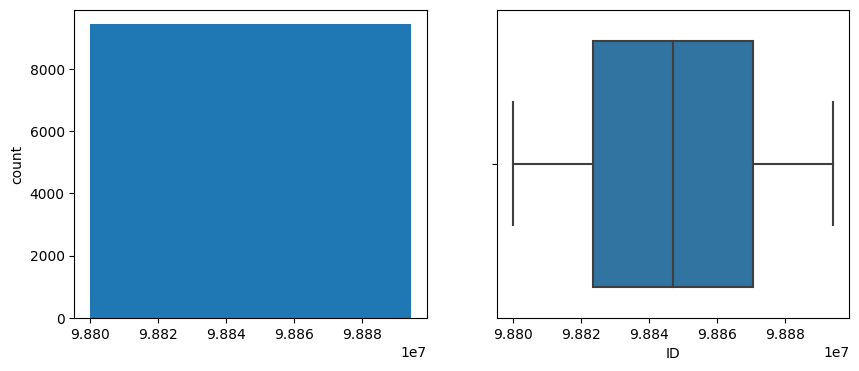

Overall_Experience
Skew : -0.19


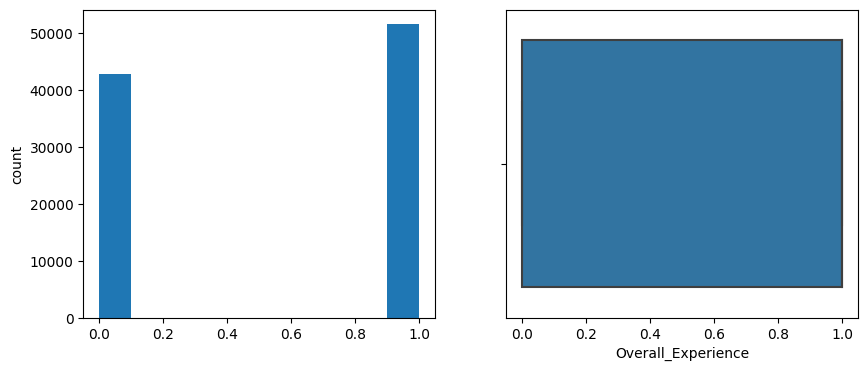

Age
Skew : -0.0


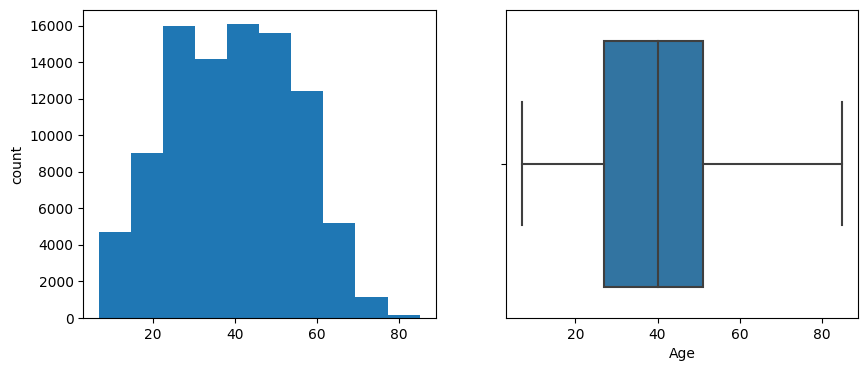

Travel_Distance
Skew : 0.47


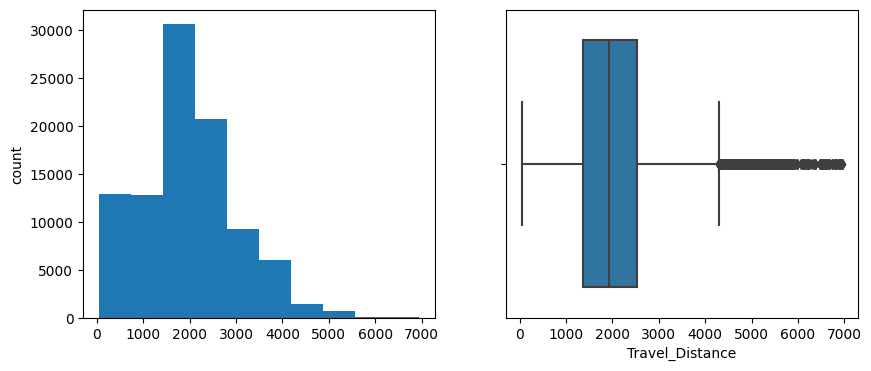

Departure_Delay_in_Mins
Skew : 7.16


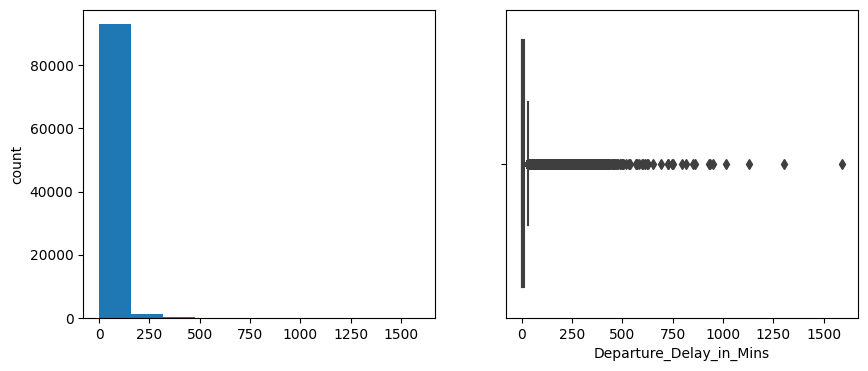

Arrival_Delay_in_Mins
Skew : 6.98


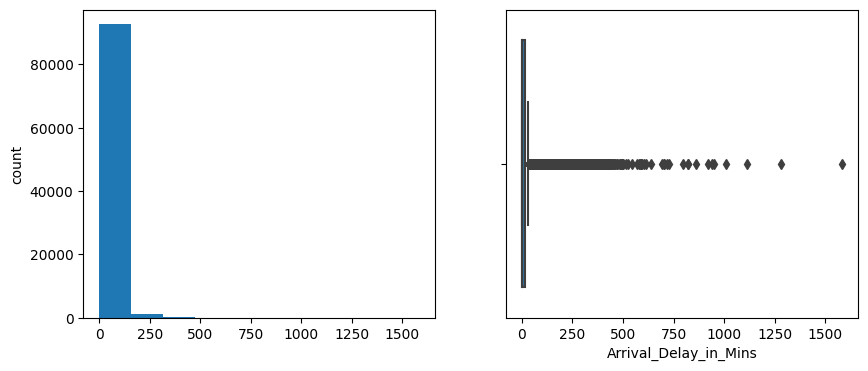

In [ ]:
#histogram and boxplot of numerical variables
for feature in df_train_num:
    print(feature)

    print('Skew :',round(df_train_num[feature].skew(), 2))

    plt.figure(figsize = (10, 4))

    plt.subplot(1, 2, 1)

    df_train_num[feature].hist(bins = 10, grid = False)

    plt.ylabel('count')

    plt.subplot(1, 2, 2)

    sns.boxplot(x = df_train_num[feature])

    plt.show()

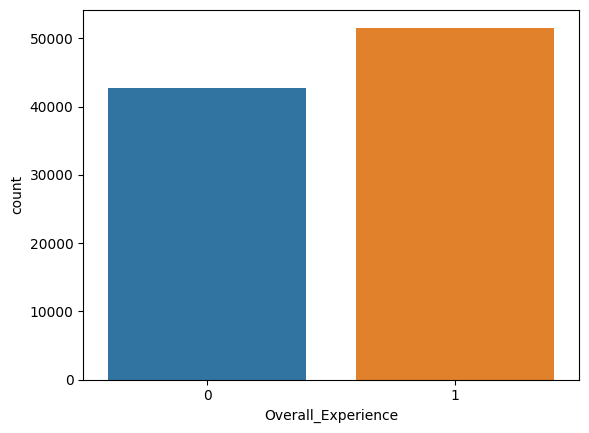

In [ ]:
sns.countplot(x='Overall_Experience',data = df_train)
plt.show()

In [ ]:
df_train_num = df_train_num.drop(['Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins'],axis = 1)

**Treating Outliers**

In [ ]:
#function to treat outliers
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame

    '''

    Q1=df[col].quantile(q = .25) # 25th quantile
    Q3=df[col].quantile(q = .75)  # 75th quantile
    IQR = Q3-Q1   # IQR Range
    Lower_Whisker = Q1 - 1.5*IQR  #define lower whisker
    Upper_Whisker = Q3 + 1.5*IQR  # define upper Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)

    return df

In [ ]:
#copy data
df_raw = df_train.copy()

numerical_col = df_raw.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

df_train = treat_outliers_all(df_raw,numerical_col)

In [ ]:
df_train_num.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,94379.0,9.884719e+07,27245.014865,98800001.0,98823595.5,98847190.0,98870784.5,98894379.0
Overall_Experience,94379.0,5.466576e-01,0.497821,0.0,0.0,1.0,1.0,1.0
Age,94346.0,3.941965e+01,15.116632,7.0,27.0,40.0,51.0,85.0
Travel_Distance,94379.0,1.978888e+03,1027.961019,50.0,1359.0,1923.0,2538.0,6951.0


**Treating Missing Values**

In [ ]:
df_train_num.isnull().sum()

ID                     0
Overall_Experience     0
Age                   33
Travel_Distance        0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(missing_values= np.nan, strategy='median')
imr = imputer.fit(df_train_num)
df_train_num = pd.DataFrame(imr.transform(df_train_num), columns=df_train_num.columns)

In [ ]:
df_train_num.isnull().sum()

ID                    0
Overall_Experience    0
Age                   0
Travel_Distance       0
dtype: int64

In [ ]:
df_train_cat.isnull().sum()

Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
Gender                       77
Customer_Type              8951
Type_Travel                9226
Travel_Class                  0
dtype: int64

In [ ]:
df_train_cat = df_train_cat.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [ ]:
df_train_cat.isnull().sum()

Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
Gender                     0
Customer_Type              0
Type_Travel                0
Travel_Class               0
dtype: int64

In [ ]:
df_train_cat.head()

,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender,Customer_Type,Type_Travel,Travel_Class
0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor,Female,Loyal Customer,Business Travel,Business
1,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good,Male,Loyal Customer,Personal Travel,Eco
2,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent,Female,Loyal Customer,Business Travel,Business
3,Acceptable,Ordinary,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable,Female,Loyal Customer,Business Travel,Business
4,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good,Female,Loyal Customer,Business Travel,Business


In [ ]:
df_train_num.head()

,ID,Overall_Experience,Age,Travel_Distance
0,98800001.0,0.0,52.0,272.0
1,98800002.0,0.0,48.0,2200.0
2,98800003.0,1.0,43.0,1061.0
3,98800004.0,0.0,44.0,780.0
4,98800005.0,1.0,50.0,1981.0


In [ ]:
#binning the age variable in to 5 bins
df_train['Age'] = pd.cut(df_train['Age'], 5, labels = ['25', '35', '45', '60', '80'])

In [ ]:
display("Age:", df_train.Age.unique())


'Age:'

['45', '60', '25', '35', '80', NaN]
Categories (5, object): ['25' < '35' < '45' < '60' < '80']

In [ ]:
df_train = pd.get_dummies(df_train, columns = ['Age'])

In [ ]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,94379.0,9.884719e+07,27245.014865,98800001.0,98823595.5,98847190.0,98870784.5,98894379.0
Overall_Experience,94379.0,5.466576e-01,0.497821,0.0,0.0,1.0,1.0,1.0
Travel_Distance,94379.0,1.966797e+03,994.292297,50.0,1359.0,1923.0,2538.0,4306.5
Departure_Delay_in_Mins,94322.0,7.353300e+00,11.200663,0.0,0.0,0.0,12.0,30.0
Arrival_Delay_in_Mins,94022.0,7.909691e+00,11.970085,0.0,0.0,0.0,13.0,32.5
Age_25,94379.0,1.452760e-01,0.352381,0.0,0.0,0.0,0.0,1.0
Age_35,94379.0,3.191812e-01,0.466162,0.0,0.0,0.0,1.0,1.0
Age_45,94379.0,3.353818e-01,0.472126,0.0,0.0,0.0,1.0,1.0
Age_60,94379.0,1.861749e-01,0.389250,0.0,0.0,0.0,0.0,1.0
Age_80,94379.0,1.363651e-02,0.115977,0.0,0.0,0.0,0.0,1.0


**Scaling the train data**

In [ ]:
from scipy.stats import zscore
#df_train_num_scaled=df_train_num[['Travel_Distance','Departure_Delay_in_Mins','Arrival_Delay_in_Mins']].apply(zscore)
df_train_num_scaled=df_train_num[['Travel_Distance']].apply(zscore)

In [ ]:
df_train_num_scaled.head()

,Travel_Distance
0,-1.660469
1,0.215099
2,-0.892926
3,-1.166284
4,0.002054


In [ ]:
#Concate with target column
df_train = pd.concat([df_train_num['Overall_Experience'], df_train['Age_25'],df_train['Age_35'], df_train['Age_45'], df_train['Age_60'], df_train['Age_80'],df_train_num_scaled, df_train_cat], axis = 1, join = 'inner')

In [ ]:
df_train.head()

,Overall_Experience,Age_25,Age_35,Age_45,Age_60,Age_80,Travel_Distance,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,...,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender,Customer_Type,Type_Travel,Travel_Class
0,0.0,0,0,1,0,0,-1.660469,Needs Improvement,Green Car,Excellent,...,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor,Female,Loyal Customer,Business Travel,Business
1,0.0,0,0,1,0,0,0.215099,Poor,Ordinary,Excellent,...,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good,Male,Loyal Customer,Personal Travel,Eco
2,1.0,0,0,1,0,0,-0.892926,Needs Improvement,Green Car,Needs Improvement,...,Excellent,Excellent,Excellent,Good,Excellent,Excellent,Female,Loyal Customer,Business Travel,Business
3,0.0,0,0,1,0,0,-1.166284,Acceptable,Ordinary,Needs Improvement,...,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable,Female,Loyal Customer,Business Travel,Business
4,1.0,0,0,1,0,0,0.002054,Acceptable,Ordinary,Acceptable,...,Good,Good,Good,Good,Good,Good,Female,Loyal Customer,Business Travel,Business


In [ ]:
df_train.shape

(94379, 26)

In [ ]:
df_train['Overall_Experience'] = df_train['Overall_Experience'].astype('int64')

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Overall_Experience       94379 non-null  int64  
 1   Age_25                   94379 non-null  uint8  
 2   Age_35                   94379 non-null  uint8  
 3   Age_45                   94379 non-null  uint8  
 4   Age_60                   94379 non-null  uint8  
 5   Age_80                   94379 non-null  uint8  
 6   Travel_Distance          94379 non-null  float64
 7   Seat_Comfort             94379 non-null  object 
 8   Seat_Class               94379 non-null  object 
 9   Arrival_Time_Convenient  94379 non-null  object 
 10  Catering                 94379 non-null  object 
 11  Platform_Location        94379 non-null  object 
 12  Onboard_Wifi_Service     94379 non-null  object 
 13  Onboard_Entertainment    94379 non-null  object 
 14  Online_Support        

In [ ]:
for feature in df_train.columns:
    if df_train[feature].dtype == 'object':
        print(feature)
        print(df_train[feature].value_counts())
        print('\n')

Seat_Comfort
Acceptable           21219
Needs Improvement    20946
Good                 20595
Poor                 15185
Excellent            12971
Extremely Poor        3463
Name: Seat_Comfort, dtype: int64


Seat_Class
Green Car    47435
Ordinary     46944
Name: Seat_Class, dtype: int64


Arrival_Time_Convenient
Good                 28504
Excellent            17684
Acceptable           15177
Needs Improvement    14990
Poor                 13692
Extremely Poor        4332
Name: Arrival_Time_Convenient, dtype: int64


Catering
Acceptable           27209
Needs Improvement    17978
Good                 17969
Poor                 13858
Excellent            13455
Extremely Poor        3910
Name: Catering, dtype: int64


Platform_Location
Manageable           24203
Convenient           21912
Needs Improvement    17832
Inconvenient         16449
Very Convenient      13981
Very Inconvenient        2
Name: Platform_Location, dtype: int64


Onboard_Wifi_Service
Good                 22865
Excell

In [ ]:
df_train.columns

Index(['Overall_Experience', 'Age_25', 'Age_35', 'Age_45', 'Age_60', 'Age_80',
       'Travel_Distance', 'Seat_Comfort', 'Seat_Class',
       'Arrival_Time_Convenient', 'Catering', 'Platform_Location',
       'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
       'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom',
       'Baggage_Handling', 'CheckIn_Service', 'Cleanliness', 'Online_Boarding',
       'Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class'],
      dtype='object')

In [ ]:
#Encoding Categorical Values.
df_train = df_train.replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'],
           [6, 5, 4, 3, 2, 1])
df_train = df_train.replace(['Female', 'Male'], [1,0])
df_train = df_train.replace(['Loyal Customer', 'Disloyal Customer'], [1,0])
df_train = df_train.replace(['Business Travel', 'Personal Travel'], [1,0])
df_train = df_train.replace(['Business', 'Eco'], [1,0])
df_train = df_train.replace(['Green Car', 'Ordinary'], [1,0])
df_train = df_train.replace(['Very Convenient', 'Convenient', 'Manageable', 'Needs Improvement', 'Inconvenient', 'Very Inconvenient'],
           [6, 5, 4, 3, 2, 1])

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Overall_Experience       94379 non-null  int64  
 1   Age_25                   94379 non-null  uint8  
 2   Age_35                   94379 non-null  uint8  
 3   Age_45                   94379 non-null  uint8  
 4   Age_60                   94379 non-null  uint8  
 5   Age_80                   94379 non-null  uint8  
 6   Travel_Distance          94379 non-null  float64
 7   Seat_Comfort             94379 non-null  int64  
 8   Seat_Class               94379 non-null  int64  
 9   Arrival_Time_Convenient  94379 non-null  int64  
 10  Catering                 94379 non-null  int64  
 11  Platform_Location        94379 non-null  int64  
 12  Onboard_Wifi_Service     94379 non-null  int64  
 13  Onboard_Entertainment    94379 non-null  int64  
 14  Online_Support        

In [ ]:
df_train.shape

(94379, 26)

In [ ]:
df_train.isnull().sum()

Overall_Experience         0
Age_25                     0
Age_35                     0
Age_45                     0
Age_60                     0
Age_80                     0
Travel_Distance            0
Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
Gender                     0
Customer_Type              0
Type_Travel                0
Travel_Class               0
dtype: int64

In [ ]:
df_train.head()

,Overall_Experience,Age_25,Age_35,Age_45,Age_60,Age_80,Travel_Distance,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,...,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender,Customer_Type,Type_Travel,Travel_Class
0,0,0,0,1,0,0,-1.660469,3,1,6,...,3,4,3,5,3,2,1,1,1,1
1,0,0,0,1,0,0,0.215099,2,0,6,...,6,3,2,3,5,5,0,1,0,0
2,1,0,0,1,0,0,-0.892926,3,1,3,...,6,6,6,5,6,6,1,1,1,1
3,0,0,0,1,0,0,-1.166284,4,0,3,...,4,4,4,5,4,4,1,1,1,1
4,1,0,0,1,0,0,0.002054,4,0,4,...,5,5,5,5,5,5,1,1,1,1


In [ ]:
df_train.tail()

,Overall_Experience,Age_25,Age_35,Age_45,Age_60,Age_80,Travel_Distance,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,...,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender,Customer_Type,Type_Travel,Travel_Class
94374,0,0,1,0,0,0,-0.604976,2,0,5,...,5,5,5,3,5,2,0,1,1,1
94375,1,0,0,1,0,0,-1.349171,5,0,5,...,4,4,4,5,4,5,0,1,1,1
94376,1,0,0,0,1,0,0.792945,3,1,3,...,5,5,5,4,5,4,0,1,1,1
94377,0,1,0,0,0,0,0.744304,3,0,5,...,4,5,5,5,6,5,0,1,0,0
94378,0,0,0,0,1,0,0.124628,4,0,2,...,2,5,5,2,5,4,0,1,1,0


In [ ]:
#summary
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Overall_Experience,94379.0,5.466576e-01,0.497821,0.000000,0.00000,1.000000,1.000000,1.000000
Age_25,94379.0,1.452760e-01,0.352381,0.000000,0.00000,0.000000,0.000000,1.000000
Age_35,94379.0,3.191812e-01,0.466162,0.000000,0.00000,0.000000,1.000000,1.000000
Age_45,94379.0,3.353818e-01,0.472126,0.000000,0.00000,0.000000,1.000000,1.000000
Age_60,94379.0,1.861749e-01,0.389250,0.000000,0.00000,0.000000,0.000000,1.000000
Age_80,94379.0,1.363651e-02,0.115977,0.000000,0.00000,0.000000,0.000000,1.000000
Travel_Distance,94379.0,-4.042864e-17,1.000005,-1.876431,-0.60303,-0.054368,0.543907,4.836894
Seat_Comfort,94379.0,3.839286e+00,1.392082,1.000000,3.00000,4.000000,5.000000,6.000000
Seat_Class,94379.0,5.026012e-01,0.499996,0.000000,0.00000,1.000000,1.000000,1.000000
Arrival_Time_Convenient,94379.0,4.090084e+00,1.481769,1.000000,3.00000,4.000000,5.000000,6.000000


# Test dataset

In [ ]:
#Read all csv files
df_Surveydata_test = pd.read_csv('/content/drive/MyDrive/MIT ADSP/Hackathon/Surveydata_test_.csv')
df_Traveldata_test = pd.read_csv('/content/drive/MyDrive/MIT ADSP/Hackathon/Traveldata_test_.csv')

In [ ]:
# Surveydata_test_head
df_Surveydata_test.head()

,ID,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,Acceptable,Green Car,Acceptable,Acceptable,Manageable,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor
1,99900002,Extremely Poor,Ordinary,Good,Poor,Manageable,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable
2,99900003,Excellent,Ordinary,Excellent,Excellent,Very Convenient,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent
3,99900004,Acceptable,Green Car,Excellent,Acceptable,Very Convenient,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor
4,99900005,Excellent,Ordinary,Extremely Poor,Excellent,Needs Improvement,Excellent,Excellent,Excellent,Excellent,NaN,Acceptable,Excellent,Excellent,Excellent,Excellent


In [ ]:
# Surveydata_test_tail
df_Surveydata_test.tail()

,ID,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
35597,99935598,Needs Improvement,Green Car,Excellent,Needs Improvement,Manageable,Acceptable,Needs Improvement,Acceptable,Acceptable,Good,Excellent,Good,Acceptable,Good,Acceptable
35598,99935599,Needs Improvement,Ordinary,Needs Improvement,Good,Needs Improvement,Acceptable,Excellent,Excellent,Good,Good,Good,Good,Acceptable,Good,Good
35599,99935600,Good,Green Car,Extremely Poor,Good,Needs Improvement,Needs Improvement,Good,Poor,Needs Improvement,Poor,Acceptable,Poor,Poor,Excellent,Needs Improvement
35600,99935601,Excellent,Ordinary,Excellent,Excellent,Inconvenient,Acceptable,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Acceptable,Excellent,Good
35601,99935602,Good,Ordinary,Acceptable,Good,Manageable,Poor,Good,Poor,Poor,Acceptable,Good,Good,Needs Improvement,Good,Poor


In [ ]:
# Travel data_test_Head
df_Traveldata_test.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,99900001,Female,NaN,36.0,Business Travel,Business,532,0.0,0.0
1,99900002,Female,Disloyal Customer,21.0,Business Travel,Business,1425,9.0,28.0
2,99900003,Male,Loyal Customer,60.0,Business Travel,Business,2832,0.0,0.0
3,99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0
4,99900005,Male,Disloyal Customer,18.0,Business Travel,Business,1610,17.0,0.0


In [ ]:
# Travel data_test_tail
df_Traveldata_test.tail()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
35597,99935598,Male,Loyal Customer,8.0,Personal Travel,Eco,1334,0.0,0.0
35598,99935599,Female,Loyal Customer,53.0,Business Travel,Business,1772,0.0,0.0
35599,99935600,Male,Disloyal Customer,22.0,Business Travel,Eco,1180,0.0,0.0
35600,99935601,Female,Loyal Customer,67.0,Personal Travel,Eco,420,23.0,16.0
35601,99935602,Male,NaN,20.0,Personal Travel,Eco,1680,0.0,0.0


In [ ]:
# shape of surveydata test
df_Surveydata_test.shape

(35602, 16)

In [ ]:
# shape of traveldata test
df_Traveldata_test.shape

(35602, 9)

In [ ]:
# merge Surveydata & travel data for Train and testset
df_test = pd.merge (df_Surveydata_test, df_Traveldata_test, on = 'ID' , how = 'outer')

In [ ]:
# merged testset first 5 rows
df_test.head()

,ID,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,...,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,99900001,Acceptable,Green Car,Acceptable,Acceptable,Manageable,Needs Improvement,Excellent,Good,Excellent,...,Excellent,Poor,Female,NaN,36.0,Business Travel,Business,532,0.0,0.0
1,99900002,Extremely Poor,Ordinary,Good,Poor,Manageable,Acceptable,Poor,Acceptable,Acceptable,...,Excellent,Acceptable,Female,Disloyal Customer,21.0,Business Travel,Business,1425,9.0,28.0
2,99900003,Excellent,Ordinary,Excellent,Excellent,Very Convenient,Excellent,Excellent,Excellent,Needs Improvement,...,Needs Improvement,Excellent,Male,Loyal Customer,60.0,Business Travel,Business,2832,0.0,0.0
3,99900004,Acceptable,Green Car,Excellent,Acceptable,Very Convenient,Poor,Acceptable,Excellent,Poor,...,Excellent,Poor,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0
4,99900005,Excellent,Ordinary,Extremely Poor,Excellent,Needs Improvement,Excellent,Excellent,Excellent,Excellent,...,Excellent,Excellent,Male,Disloyal Customer,18.0,Business Travel,Business,1610,17.0,0.0


In [ ]:
# merged testset last 5 rows
df_test.tail()

,ID,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,...,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
35597,99935598,Needs Improvement,Green Car,Excellent,Needs Improvement,Manageable,Acceptable,Needs Improvement,Acceptable,Acceptable,...,Good,Acceptable,Male,Loyal Customer,8.0,Personal Travel,Eco,1334,0.0,0.0
35598,99935599,Needs Improvement,Ordinary,Needs Improvement,Good,Needs Improvement,Acceptable,Excellent,Excellent,Good,...,Good,Good,Female,Loyal Customer,53.0,Business Travel,Business,1772,0.0,0.0
35599,99935600,Good,Green Car,Extremely Poor,Good,Needs Improvement,Needs Improvement,Good,Poor,Needs Improvement,...,Excellent,Needs Improvement,Male,Disloyal Customer,22.0,Business Travel,Eco,1180,0.0,0.0
35600,99935601,Excellent,Ordinary,Excellent,Excellent,Inconvenient,Acceptable,Excellent,Good,Excellent,...,Excellent,Good,Female,Loyal Customer,67.0,Personal Travel,Eco,420,23.0,16.0
35601,99935602,Good,Ordinary,Acceptable,Good,Manageable,Poor,Good,Poor,Poor,...,Good,Poor,Male,NaN,20.0,Personal Travel,Eco,1680,0.0,0.0


In [ ]:
#shape of merged test dataset
df_test.shape

(35602, 24)

In [ ]:
#info of merged test dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Seat_Comfort             35580 non-null  object 
 2   Seat_Class               35602 non-null  object 
 3   Arrival_Time_Convenient  32277 non-null  object 
 4   Catering                 32245 non-null  object 
 5   Platform_Location        35590 non-null  object 
 6   Onboard_Wifi_Service     35590 non-null  object 
 7   Onboard_Entertainment    35594 non-null  object 
 8   Online_Support           35576 non-null  object 
 9   Ease_of_Online_Booking   35584 non-null  object 
 10  Onboard_Service          32730 non-null  object 
 11  Legroom                  35577 non-null  object 
 12  Baggage_Handling         35562 non-null  object 
 13  CheckIn_Service          35580 non-null  object 
 14  Cleanliness           

In [ ]:
#Summary of numerical features of merged test dataset
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,35602.0,9.991780e+07,10277.556478,99900001.0,99908901.25,99917801.5,99926701.75,99935602.0
Age,35591.0,3.944700e+01,15.137554,7.0,27.00,40.0,51.00,85.0
Travel_Distance,35602.0,1.987152e+03,1024.308863,50.0,1360.00,1929.0,2559.00,6868.0
Departure_Delay_in_Mins,35573.0,1.488070e+01,37.895453,0.0,0.00,0.0,13.00,978.0
Arrival_Delay_in_Mins,35479.0,1.530880e+01,38.531293,0.0,0.00,0.0,13.00,970.0


In [ ]:
#Summary of Categorical features of merged test dataset
df_test.describe(include = ['object']).T

,count,unique,top,freq
Seat_Comfort,35580,6,Acceptable,8003
Seat_Class,35602,2,Ordinary,17860
Arrival_Time_Convenient,32277,6,Good,7361
Catering,32245,6,Acceptable,7133
Platform_Location,35590,5,Manageable,9364
Onboard_Wifi_Service,35590,6,Good,8743
Onboard_Entertainment,35594,6,Good,11436
Online_Support,35576,5,Good,11487
Ease_of_Online_Booking,35584,6,Good,11025
Onboard_Service,32730,5,Good,10222


## Checking for duplicate records in the Test dataset

In [ ]:
#check for duplicate
dup_test = df_test.duplicated()
print('Number of duplicate row = %d' %(dup_test.sum()))

Number of duplicate row = 0


In [ ]:
df_test_num = df_test.select_dtypes(['float64','int64'])
df_test_cat = df_test.select_dtypes(['object'])

In [ ]:
df_test_num=df_test_num.drop(['Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins'], axis = 1)

In [ ]:
df_test_num.shape

(35602, 3)

In [ ]:
df_test_num.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,35602.0,9.991780e+07,10277.556478,99900001.0,99908901.25,99917801.5,99926701.75,99935602.0
Age,35591.0,3.944700e+01,15.137554,7.0,27.00,40.0,51.00,85.0
Travel_Distance,35602.0,1.987152e+03,1024.308863,50.0,1360.00,1929.0,2559.00,6868.0


**Remove outlier**

In [ ]:
#function to treat outliers
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame

    '''

    Q1=df[col].quantile(q = .25) # 25th quantile
    Q3=df[col].quantile(q = .75)  # 75th quantile
    IQR = Q3-Q1   # IQR Range
    Lower_Whisker = Q1 - 1.5*IQR  #define lower whisker
    Upper_Whisker = Q3 + 1.5*IQR  # define upper Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)

    return df

In [ ]:
#copy data
df_raw_test = df_test.copy()

numerical_col = df_raw_test.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

df_test = treat_outliers_all(df_raw_test,numerical_col)

**Handling missing value**

In [ ]:
df_test_num.isnull().sum()

ID                  0
Age                11
Travel_Distance     0
dtype: int64

In [ ]:
imputer = SimpleImputer(missing_values= np.nan, strategy='median')
imr = imputer.fit(df_test_num)
df_test_num = pd.DataFrame(imr.transform(df_test_num), columns=df_test_num.columns)

In [ ]:
df_test_num.isnull().sum()

ID                 0
Age                0
Travel_Distance    0
dtype: int64

In [ ]:
df_test_cat.isnull().sum()

Seat_Comfort                 22
Seat_Class                    0
Arrival_Time_Convenient    3325
Catering                   3357
Platform_Location            12
Onboard_Wifi_Service         12
Onboard_Entertainment         8
Online_Support               26
Ease_of_Online_Booking       18
Onboard_Service            2872
Legroom                      25
Baggage_Handling             40
CheckIn_Service              22
Cleanliness                   2
Online_Boarding               2
Gender                       30
Customer_Type              3383
Type_Travel                3448
Travel_Class                  0
dtype: int64

In [ ]:
df_test_cat = df_test_cat.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [ ]:
df_test_cat.isnull().sum()

Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
Gender                     0
Customer_Type              0
Type_Travel                0
Travel_Class               0
dtype: int64

In [ ]:
df_test['Age'] = pd.cut(df_test['Age'], 5, labels = ['25', '35', '45', '60', '80'])
display("Age:", df_test.Age.unique())
df_test = pd.get_dummies(df_test, columns = ['Age'])

'Age:'

['35', '25', '60', '45', '80', NaN]
Categories (5, object): ['25' < '35' < '45' < '60' < '80']

In [ ]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,35602.0,9.991780e+07,10277.556478,99900001.0,99908901.25,99917801.5,99926701.75,99935602.0
Travel_Distance,35602.0,1.976637e+03,994.892373,50.0,1360.00,1929.0,2559.00,4357.5
Departure_Delay_in_Mins,35573.0,7.787395e+00,11.924506,0.0,0.00,0.0,13.00,32.5
Arrival_Delay_in_Mins,35479.0,7.989924e+00,12.005410,0.0,0.00,0.0,13.00,32.5
Age_25,35602.0,1.459749e-01,0.353086,0.0,0.00,0.0,0.00,1.0
Age_35,35602.0,3.194203e-01,0.466259,0.0,0.00,0.0,1.00,1.0
Age_45,35602.0,3.327341e-01,0.471199,0.0,0.00,0.0,1.00,1.0
Age_60,35602.0,1.890905e-01,0.391586,0.0,0.00,0.0,0.00,1.0
Age_80,35602.0,1.247121e-02,0.110978,0.0,0.00,0.0,0.00,1.0


In [ ]:
#Scaled numerical data
df_test_num_scaled=df_test_num[['Travel_Distance']].apply(zscore)

In [ ]:
df_test_num_scaled.head()

,Travel_Distance
0,-1.420638
1,-0.548819
2,0.824810
3,-0.620087
4,-0.368206


In [ ]:
df_test = pd.concat([df_test['Age_25'],df_test['Age_35'], df_test['Age_45'], df_test['Age_60'], df_test['Age_80'], df_test_num_scaled,df_test_cat], axis = 1, join = 'inner')

In [ ]:
df_test.head()

,Age_25,Age_35,Age_45,Age_60,Age_80,Travel_Distance,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,...,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender,Customer_Type,Type_Travel,Travel_Class
0,0,1,0,0,0,-1.420638,Acceptable,Green Car,Acceptable,Acceptable,...,Excellent,Excellent,Excellent,Good,Excellent,Poor,Female,Loyal Customer,Business Travel,Business
1,1,0,0,0,0,-0.548819,Extremely Poor,Ordinary,Good,Poor,...,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable,Female,Disloyal Customer,Business Travel,Business
2,0,0,0,1,0,0.824810,Excellent,Ordinary,Excellent,Excellent,...,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent,Male,Loyal Customer,Business Travel,Business
3,0,1,0,0,0,-0.620087,Acceptable,Green Car,Excellent,Acceptable,...,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor,Female,Loyal Customer,Personal Travel,Eco
4,1,0,0,0,0,-0.368206,Excellent,Ordinary,Extremely Poor,Excellent,...,Good,Acceptable,Excellent,Excellent,Excellent,Excellent,Male,Disloyal Customer,Business Travel,Business


In [ ]:
df_test.shape

(35602, 25)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age_25                   35602 non-null  uint8  
 1   Age_35                   35602 non-null  uint8  
 2   Age_45                   35602 non-null  uint8  
 3   Age_60                   35602 non-null  uint8  
 4   Age_80                   35602 non-null  uint8  
 5   Travel_Distance          35602 non-null  float64
 6   Seat_Comfort             35602 non-null  object 
 7   Seat_Class               35602 non-null  object 
 8   Arrival_Time_Convenient  35602 non-null  object 
 9   Catering                 35602 non-null  object 
 10  Platform_Location        35602 non-null  object 
 11  Onboard_Wifi_Service     35602 non-null  object 
 12  Onboard_Entertainment    35602 non-null  object 
 13  Online_Support           35602 non-null  object 
 14  Ease_of_Online_Booking

In [ ]:
for feature in df_test.columns:
    if df_test[feature].dtype == 'object':
        print(feature)
        print(df_test[feature].value_counts())
        print('\n')

Seat_Comfort
Acceptable           8025
Needs Improvement    7831
Good                 7808
Poor                 5755
Excellent            4854
Extremely Poor       1329
Name: Seat_Comfort, dtype: int64


Seat_Class
Ordinary     17860
Green Car    17742
Name: Seat_Class, dtype: int64


Arrival_Time_Convenient
Good                 10686
Excellent             6589
Acceptable            5844
Needs Improvement     5684
Poor                  5131
Extremely Poor        1668
Name: Arrival_Time_Convenient, dtype: int64


Catering
Acceptable           10490
Needs Improvement     6701
Good                  6701
Poor                  5178
Excellent             5025
Extremely Poor        1507
Name: Catering, dtype: int64


Platform_Location
Manageable           9376
Convenient           8178
Needs Improvement    6703
Inconvenient         6134
Very Convenient      5211
Name: Platform_Location, dtype: int64


Onboard_Wifi_Service
Good                 8755
Excellent            7875
Acceptable         

In [ ]:
df_test.columns

Index(['Age_25', 'Age_35', 'Age_45', 'Age_60', 'Age_80', 'Travel_Distance',
       'Seat_Comfort', 'Seat_Class', 'Arrival_Time_Convenient', 'Catering',
       'Platform_Location', 'Onboard_Wifi_Service', 'Onboard_Entertainment',
       'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service',
       'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness',
       'Online_Boarding', 'Gender', 'Customer_Type', 'Type_Travel',
       'Travel_Class'],
      dtype='object')

In [ ]:
#Encoding Categorical Values.
df_test = df_test.replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'],
           [6, 5, 4, 3, 2, 1])
df_test = df_test.replace(['Female', 'Male'], [1,0])
df_test = df_test.replace(['Loyal Customer', 'Disloyal Customer'], [1,0])
df_test = df_test.replace(['Business Travel', 'Personal Travel'], [1,0])
df_test = df_test.replace(['Business', 'Eco'], [1,0])
df_test = df_test.replace(['Green Car', 'Ordinary'], [1,0])
df_test = df_test.replace(['Very Convenient', 'Convenient', 'Manageable', 'Needs Improvement', 'Inconvenient', 'Very Inconvenient'],
           [6, 5, 4, 3, 2, 1])

In [ ]:
df_test.shape

(35602, 25)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age_25                   35602 non-null  uint8  
 1   Age_35                   35602 non-null  uint8  
 2   Age_45                   35602 non-null  uint8  
 3   Age_60                   35602 non-null  uint8  
 4   Age_80                   35602 non-null  uint8  
 5   Travel_Distance          35602 non-null  float64
 6   Seat_Comfort             35602 non-null  int64  
 7   Seat_Class               35602 non-null  int64  
 8   Arrival_Time_Convenient  35602 non-null  int64  
 9   Catering                 35602 non-null  int64  
 10  Platform_Location        35602 non-null  int64  
 11  Onboard_Wifi_Service     35602 non-null  int64  
 12  Onboard_Entertainment    35602 non-null  int64  
 13  Online_Support           35602 non-null  int64  
 14  Ease_of_Online_Booking

In [ ]:
df_test.isnull().sum()

Age_25                     0
Age_35                     0
Age_45                     0
Age_60                     0
Age_80                     0
Travel_Distance            0
Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
Gender                     0
Customer_Type              0
Type_Travel                0
Travel_Class               0
dtype: int64

In [ ]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Age_25,35602.0,1.459749e-01,0.353086,0.000000,0.000000,0.000000,0.000000,1.000000
Age_35,35602.0,3.194203e-01,0.466259,0.000000,0.000000,0.000000,1.000000,1.000000
Age_45,35602.0,3.327341e-01,0.471199,0.000000,0.000000,0.000000,1.000000,1.000000
Age_60,35602.0,1.890905e-01,0.391586,0.000000,0.000000,0.000000,0.000000,1.000000
Age_80,35602.0,1.247121e-02,0.110978,0.000000,0.000000,0.000000,0.000000,1.000000
Travel_Distance,35602.0,5.588224e-18,1.000014,-1.891206,-0.612277,-0.056773,0.558285,4.765083
Seat_Comfort,35602.0,3.836751e+00,1.393053,1.000000,3.000000,4.000000,5.000000,6.000000
Seat_Class,35602.0,4.983428e-01,0.500004,0.000000,0.000000,0.000000,1.000000,1.000000
Arrival_Time_Convenient,35602.0,4.081849e+00,1.480409,1.000000,3.000000,4.000000,5.000000,6.000000
Catering,35602.0,3.864418e+00,1.373103,1.000000,3.000000,4.000000,5.000000,6.000000


In [ ]:
# making copies of dataset
df_train_1 = df_train.copy()
df_train_2 = df_train.copy()

In [ ]:
df_train_1 .describe()

,Overall_Experience,Age_25,Age_35,Age_45,Age_60,Age_80,Travel_Distance,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,...,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender,Customer_Type,Type_Travel,Travel_Class
count,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,9.437900e+04,94379.000000,94379.000000,94379.000000,...,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000
mean,0.546658,0.145276,0.319181,0.335382,0.186175,0.013637,-4.042864e-17,3.839286,0.502601,4.090084,...,4.513419,4.483487,4.697242,4.342936,4.704097,4.351943,0.507443,0.834656,0.718836,0.477193
std,0.497821,0.352381,0.466162,0.472126,0.389250,0.115977,1.000005e+00,1.392082,0.499996,1.481769,...,1.224912,1.291743,1.155589,1.259933,1.151954,1.298030,0.499947,0.371493,0.449570,0.499482
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.876431e+00,1.000000,0.000000,1.000000,...,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.030301e-01,3.000000,0.000000,3.000000,...,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.436829e-02,4.000000,1.000000,4.000000,...,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,1.000000,1.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,5.439066e-01,5.000000,1.000000,5.000000,...,5.000000,6.000000,6.000000,5.000000,6.000000,5.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.836894e+00,6.000000,1.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,1.000000,1.000000,1.000000,1.000000


## Extracting the target column into separate vectors for training set and test set

In [ ]:
X = df_train.drop('Overall_Experience',axis = 1)

y = df_train.pop('Overall_Experience')

## Splitting data into training and Validation set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [ ]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (66065, 25)
X_test (28314, 25)
y_train (66065,)
y_test (28314,)


## **Model Building**

In [ ]:
lr=LogisticRegression(C= 0.1, penalty= 'l2', solver='liblinear',random_state=42)
svc = SVC(C= 3, kernel= 'rbf', random_state=0, probability=True)
dTree=DecisionTreeClassifier(random_state =9, max_depth=15)
dTree1=DecisionTreeClassifier(random_state =9, max_depth=15, min_samples_split= 75, min_samples_leaf = 15)
rf=RandomForestClassifier(n_estimators=220, max_depth= 20, max_features= 15, random_state = 100)
rf1 = RandomForestClassifier(n_estimators=100, random_state = 100)
bc=BaggingClassifier(base_estimator=dTree, n_estimators=50, random_state=500, max_features= 10)
mlp=MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42, early_stopping=True)
gb=GradientBoostingClassifier(random_state= 3000, learning_rate=0.1, n_estimators=100)
xgb=XGBClassifier(eval_metric='mlogloss', random_state=42,learning_rate= 0.1, max_depth= 5, min_child_weight= 1, n_estimators= 100, subsample= 1.0, use_label_encoder=False,verbosity=0)
lgm=LGBMClassifier(random_state=42, force_row_wise=True)
ctb=CatBoostClassifier(verbose=0, random_state=42)
adb=AdaBoostClassifier(base_estimator=rf, n_estimators=22, learning_rate=0.1, random_state= 88)
adb1=AdaBoostClassifier(base_estimator=dTree, n_estimators=20, learning_rate=0.1, random_state= 88)
hgb=HistGradientBoostingClassifier(random_state=42)
vc1=VotingClassifier(estimators=[('rfc', rf), ('log', lr), ('svc', svc)],voting='hard')
vc2=VotingClassifier(estimators=[('rfc', rf), ('log', lr), ('svc', svc)],voting='soft')
level0 = [('lr', lr), ('rfc', rf), ('scv', svc)]
# define meta learner model
level1 = LogisticRegression()
# define the stacking ensemble
sc=StackingClassifier(estimators=level0, final_estimator=level1, cv=5)



In [ ]:
model = [lr, svc, dTree, dTree1, rf, rf1, bc, mlp, gb, xgb, lgm, ctb, adb, adb1, hgb, vc1, vc2, sc]

for i in model: #accuracy on train set from training data
    i.fit(X_train , y_train)
    y_predict = i.predict(X_train)
    display(accuracy_score(y_train, y_predict))

0.8325739801710437

In [ ]:
for i in model:  #accuracy on test set from training data
    i.fit(X_train , y_train)
    y_predict_test = i.predict(X_test)
    display(accuracy_score(y_test, y_predict_test))

## Predicting on Test Data

In [ ]:
df_test1 = df_test_num.copy()
df_test1['ID']=df_test1['ID'].astype('int64')

## **Submission**

In [ ]:
#-------- 1st BEST model File ---------
pred = adb.predict(df_test)
df_test1['Overall_Experience'] = pred
sample = df_test1[['ID', 'Overall_Experience']]
sample.to_csv('sample_rf_3.csv',index=False)

In [ ]:
#-------- 2nd BEST model File ---------
pred = rf1.predict(df_test)
df_test1['Overall_Experience'] = pred
sample = df_test1[['ID', 'Overall_Experience']]
sample.to_csv('sample_rf_4.csv',index=False)

In [ ]:
#-------- 3rd BEST model File ---------
pred = ctb.predict(df_test)
df_test1['Overall_Experience'] = pred
sample = df_test1[['ID', 'Overall_Experience']]
sample.to_csv('sample_7.csv',index=False)

In [ ]:
#-------- 4th BEST model File ---------
sc.fit(X_train , y_train)
pred = sc.predict(df_test)
df_test1['Overall_Experience'] = pred
sample = df_test1[['ID', 'Overall_Experience']]
sample.to_csv('sample_8.csv',index=False)

**Parameter Tunning**

In [ ]:
#XGB Tunning
params = { 'max_depth': stats.randint(3, 10),
          'learning_rate': stats.uniform(0.01, 0.1),
          'subsample': stats.uniform(0.5, 0.5),
          'n_estimators':stats.randint(50, 200)}
xgbr = XGBClassifier(seed = 20)
grid_obj = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=25,
                         verbose=1)

In [ ]:
grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

Fitting 5 folds for each of 25 candidates, totalling 125 fits


In [ ]:
#-------- 5th model File ---------
pred = xgb_tuned.predict(df_test)
df_test1['Overall_Experience'] = pred
sample = df_test1[['ID', 'Overall_Experience']]
sample.to_csv('sample_9_xgbtuned.csv',index=False)

In [ ]:
#Random Forest tunning (Grid Search)
# Choose the type of classifier
rf_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [100, 110, 120],
    "max_depth": [5, 6, 7],
    "max_features": [0.8, 0.9, 1]
             }
# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_tuned = grid_obj.best_estimator_
# Fitting the best algorithm to the training data
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, max_features=0.9,
                       n_estimators=110, random_state=7)

In [ ]:
#-------- 5th model File ---------
pred = rf_tuned.predict(df_test)
df_test1['Overall_Experience'] = pred
sample = df_test1[['ID', 'Overall_Experience']]
sample.to_csv('sample_10_rf_tuned.csv',index=False) #didn't find good accuracy

In [ ]:
#Adaboost tunning

grid_params = {    'n_estimators': [100,200,300]}
#Building a 3 fold CV GridSearchCV object
grid_object = GridSearchCV(estimator = adb, param_grid = grid_params, scoring = 'accuracy', cv = 3, n_jobs = -1)
#Fitting the grid to the training data
grid_object.fit(X_train, y_train)
#Extracting the best parametersgrid_object.bestparams ...

GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=20,
                                                                                max_features=15,
                                                                                n_estimators=220,
                                                                                random_state=100),
                                          learning_rate=0.1, n_estimators=22,
                                          random_state=88),
             n_jobs=-1, param_grid={'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [ ]:
# Set the classifier to the best combination of parameters
adaboost_tuned = grid_object.best_estimator_
# Fitting the best algorithm to the training data
adaboost_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=20,
                                                         max_features=15,
                                                         n_estimators=220,
                                                         random_state=100),
                   learning_rate=0.1, n_estimators=100, random_state=88)

In [ ]:
#-------- Adaboost tuned model File ---------
pred = adaboost_tuned.predict(df_test)
df_test1['Overall_Experience'] = pred
sample = df_test1[['ID', 'Overall_Experience']]
sample.to_csv('sample_13_adb_tuned.csv',index=False)

**Apply Neural Network**

In [ ]:
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_dim = X_train.shape[1]),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(32, activation='relu'),

    layers.Dense(1, activation='sigmoid'),
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                1792      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_3 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 batch_normalization_4 (Bat  (None, 32)                128       
 chNormalization)                                     

In [ ]:
model.fit(
    X_train, y_train,
    batch_size=64,
    epochs=50,
    validation_split = .2,
    verbose=1,
)

In [ ]:
#-------- NN model File ---------
pred = model.predict(df_test)
df_test1['Overall_Experience'] = pred
sample = df_test1[['ID', 'Overall_Experience']]
sample.to_csv('sample_12_nn.csv',index=False)

1113/1113 [==============================] - 4s 3ms/step


**CatBoost Randomized search**

In [ ]:
"""
# Importance of features in the tree building
def show_importance(dtree, thresh_hold=0, data=X_train):
    importance = pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = data.columns).sort_values(by = 'Imp', ascending = False)
    print (importance)
    print('0 importance features:')
    return importance[importance['Imp']<=thresh_hold], importance[importance['Imp']>thresh_hold]
"""


In [ ]:
from scipy.stats import randint as sp_randint
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
import multiprocessing


param_dist = {
    'learning_rate': [0.07, 0.08, 0.09, 0.1],
    'l2_leaf_reg': [1, 2, 3],
    'max_depth': sp_randint(9, 13),
    'n_estimators': sp_randint(100, 400)
}

# Create the CatBoostClassifier
cat = CatBoostClassifier()

n_cpus = multiprocessing.cpu_count()
# Perform random search cross-validation to find the best hyperparameters
random_search = RandomizedSearchCV(cat, param_distributions=param_dist, n_iter=50, cv=5, random_state=42, n_jobs=n_cpus)
random_search.fit(X_train, y_train)

#returns the estimator with the best performance
print(random_search.best_estimator_)

#returns the best score
print(random_search.best_score_)

#returns the best parameters
print(random_search.best_params_)

0:	learn: 0.5460123	total: 95.4ms	remaining: 32.4s
1:	learn: 0.4261197	total: 139ms	remaining: 23.5s
2:	learn: 0.3654039	total: 183ms	remaining: 20.7s
3:	learn: 0.3211175	total: 229ms	remaining: 19.3s
4:	learn: 0.2885746	total: 275ms	remaining: 18.5s
5:	learn: 0.2628920	total: 325ms	remaining: 18.1s
6:	learn: 0.2453186	total: 369ms	remaining: 17.6s
7:	learn: 0.2285008	total: 413ms	remaining: 17.2s
8:	learn: 0.2152549	total: 460ms	remaining: 17s
9:	learn: 0.2073071	total: 511ms	remaining: 16.9s
10:	learn: 0.1975673	total: 574ms	remaining: 17.2s
11:	learn: 0.1885274	total: 620ms	remaining: 17s
12:	learn: 0.1809285	total: 668ms	remaining: 16.8s
13:	learn: 0.1772967	total: 713ms	remaining: 16.7s
14:	learn: 0.1725032	total: 763ms	remaining: 16.6s
15:	learn: 0.1679284	total: 813ms	remaining: 16.5s
16:	learn: 0.1648480	total: 857ms	remaining: 16.3s
17:	learn: 0.1615239	total: 901ms	remaining: 16.2s
18:	learn: 0.1581124	total: 945ms	remaining: 16s
19:	learn: 0.1542191	total: 1s	remaining: 16.1

In [ ]:
cat = CatBoostClassifier(learning_rate=0.1, l2_leaf_reg=1, max_depth=10, n_estimators=341)
cat.fit(X_train, y_train, verbose=False)

In [ ]:
#-------- CATboost randsearch model File ---------
pred = cat.predict(df_test)
df_test1['Overall_Experience'] = pred
sample = df_test1[['ID', 'Overall_Experience']]
sample.to_csv('sample_18_catr.csv',index=False)

**Random Forest Randomized Search**

In [ ]:
# building a classifier
clf_rf = RandomForestClassifier()

# Set up the hyperparameter search
param_dist = {"max_depth": [3, None],
              "n_estimators": list(range(10, 200)),
              "max_features": list(range(1, X_test.shape[1]+1)),
              "min_samples_split": list(range(2, 11)),
              "min_samples_leaf": list(range(1, 11)),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}


# Running a randomized search over the hyperparameters
random_search = RandomizedSearchCV(clf_rf, param_distributions=param_dist)

# Fiting the model on the training data
random_search.fit(X_train, y_train)

In [ ]:
# Making predictions on the test data
rf_preds = random_search.best_estimator_
rf_preds.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_features=15, min_samples_leaf=10,
                       min_samples_split=8, n_estimators=114)

In [ ]:
#-------- Randomforest tuned randomized search model File ---------
pred = rf_preds.predict(df_test)
df_test1['Overall_Experience'] = pred
sample = df_test1[['ID', 'Overall_Experience']]
sample.to_csv('sample_17_rfr.csv',index=False)

**AdaBoost Randomized search**

In [ ]:
# building a classifier for ada boost
clf_ada = AdaBoostClassifier()

# Seting up the hyperparameter search
# looking at  setting up your search for n_estimators, learning_rate
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
param_dist = {"n_estimators": [10, 100, 200, 400],
              "learning_rate": [0.001, 0.005, .01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 10, 20]}


# Running a randomized search over the hyperparameters
ada_search = RandomizedSearchCV(clf_ada, param_distributions=param_dist)

# Fiting the model on the training data
ada_search.fit(X_train, y_train)

# Making predictions on the test data
ada_preds = ada_search.best_estimator_

In [ ]:
ada_preds.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.5, n_estimators=200)

In [ ]:
#-------- AdaBoost tuned randomized model File ---------
pred = ada_preds.predict(df_test)
df_test1['Overall_Experience'] = pred
sample = df_test1[['ID', 'Overall_Experience']]
sample.to_csv('sample_17_adar.csv',index=False)

**AdaBoost Grid search**

In [ ]:
param_grid = {
    'n_estimators': [300, 400, 500],
    'learning_rate': [0.01, 0.1, 1, 1.1],
    'algorithm': ['SAMME', 'SAMME.R']
}

ada = AdaBoostClassifier()

n_cpus = multiprocessing.cpu_count()
# Perform grid search cross-validation to find the best hyperparameters
grid_search_ada = GridSearchCV(ada, param_grid, cv=5, n_jobs=n_cpus)
grid_search_ada.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best parameters: ", grid_search_ada.best_params_)
print("Best score: ", grid_search_ada.best_score_)

Best parameters:  {'algorithm': 'SAMME.R', 'learning_rate': 1.1, 'n_estimators': 300}
Best score:  0.900264890638008


In [ ]:
# Create a new AdaBoostClassifier with the best hyperparameters
best_ada = AdaBoostClassifier(n_estimators=grid_search_ada.best_params_['n_estimators'],
                              learning_rate=grid_search_ada.best_params_['learning_rate'],
                              algorithm=grid_search_ada.best_params_['algorithm'])

# Fit the new AdaBoostClassifier with the best hyperparameters
best_ada.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1.1, n_estimators=300)

In [ ]:
#-------- AdaBoost tuned gridsearch model File ---------
pred = best_ada.predict(df_test)
df_test1['Overall_Experience'] = pred
sample = df_test1[['ID', 'Overall_Experience']]
sample.to_csv('sample_16_adag.csv',index=False)

**Oversampling train data using SMOTE**

In [ ]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over==1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over==0)))


print('After UpSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 36066
Before UpSampling, counts of label 'No': 29999 

After UpSampling, counts of label 'Yes': 36066
After UpSampling, counts of label 'No': 36066 

After UpSampling, the shape of train_X: (72132, 27)
After UpSampling, the shape of train_y: (72132,) 



In [ ]:
rf_over=RandomForestClassifier(n_estimators=220, max_depth= 20, max_features= 15, random_state = 100)
rf_over.fit(X_train_over, y_train_over)

RandomForestClassifier(max_depth=20, max_features=15, n_estimators=220,
                       random_state=100)

In [ ]:
#-------- rf  oversample model File ---------
pred = rf_over.predict(df_test)
df_test1['Overall_Experience'] = pred
sample = df_test1[['ID', 'Overall_Experience']]
sample.to_csv('sample_14_rfover.csv',index=False)

In [ ]:
#Regularization
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [100, 110, 120],
    "max_depth": [5, 6, 7],
    "max_features": [0.8, 0.9, 1]
             }

# Run the grid search
grid_obj_ov = GridSearchCV(rf_estimator_tuned, parameters, scoring = "accuracy", cv = 5)

grid_obj_ov = grid_obj_ov.fit(X_train_over, y_train_over)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj_ov.best_estimator_
# Fitting the best algorithm to the training data
rf_estimator_tuned.fit(X_train_over, y_train_over)

RandomForestClassifier(criterion='entropy', max_depth=7, max_features=0.8,
                       random_state=7)

In [ ]:
#-------- rf  oversample tuned model File ---------
pred = rf_estimator_tuned.predict(df_test)
df_test1['Overall_Experience'] = pred
sample = df_test1[['ID', 'Overall_Experience']]
sample.to_csv('sample_15_rfover_tuned.csv',index=False)

**Undersampling train data using UnderSampling**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train==0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un==1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un==0)))

print('After Under Sampling, the shape of train_X: {}'.format(X_train_un.shape))
print('After Under Sampling, the shape of train_y: {} \n'.format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 36066
Before Under Sampling, counts of label 'No': 29999 

After Under Sampling, counts of label 'Yes': 29999
After Under Sampling, counts of label 'No': 29999 

After Under Sampling, the shape of train_X: (59998, 27)
After Under Sampling, the shape of train_y: (59998,) 



In [ ]:
rf_under=RandomForestClassifier(n_estimators=220, max_depth= 20, max_features= 15, random_state = 100)
rf_under.fit(X_train_un, y_train_un)

RandomForestClassifier(max_depth=20, max_features=15, n_estimators=220,
                       random_state=100)

In [ ]:
#-------- rf  undersample model File ---------
pred = rf_under.predict(df_test)
df_test1['Overall_Experience'] = pred
sample = df_test1[['ID', 'Overall_Experience']]
sample.to_csv('sample_16_rfunder.csv',index=False)